In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from classes import *

In [2]:
DTYPE = np.float32

In [ ]:
path = r'\Deep-Learning\datasets\digits'
path_train = path + r'\train.csv'
path_test = path + r'\test.csv'

In [4]:
data_train = np.array(pd.read_csv(path_train)).astype(DTYPE)
data_test = np.array(pd.read_csv(path_test)).astype(DTYPE)

In [5]:
X_train = data_train[:, 1:] / 127.5 - 1
# total_data = np.concatenate([X_train, (data_test / 127.5 - 1)], axis=0)

In [6]:
gan_model = GAN(
    generator_neurons=[100, 256, 512, X_train.shape[1]],
    generator_activations=[ReLU(), ReLU(), Tanh()],
    discriminator_neurons=[X_train.shape[1], 512, 256, 1],
    discriminator_activations=[LeakyReLU(), LeakyReLU(), Sigmoid()],
    name='GAN_digits'
)

In [7]:
gan_model.compile(
    loss=BinaryCrossEntropy(),
    optimizer_generator=Adam(lr=0.001, decay=0, betas=(0.5, 0.9), epsilon=1e-8),
    optimizer_discriminator=Adam(lr=0.001, decay=0, betas=(0.5, 0.9), epsilon=1e-8)
)

In [ ]:
gan_model.monitorize(r'\Deep-Learning\Python\only_numpy\with_oop\gan_images', 32)

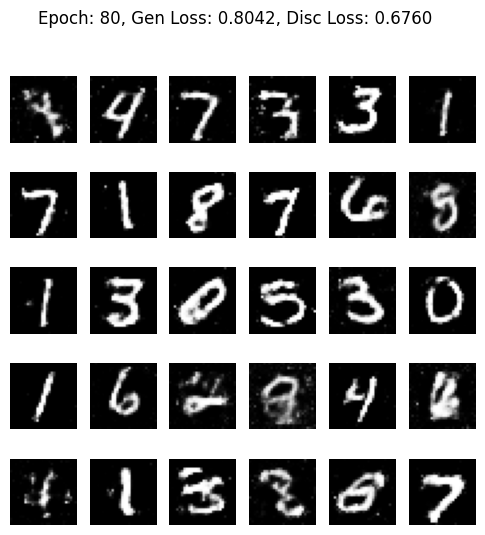

[GAN_digits]> Epoch: (80/80) (in 61.3754 seconds) G_loss: 0.8042309317087686 / D_loss:0.6760358953214486


In [9]:
gan_model.train(x=X_train, epochs=80, batch_size=256, verbose=True)

In [ ]:
gan_model.save_as_gif()